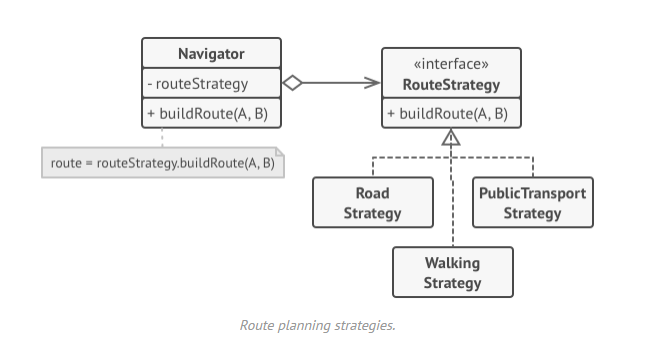

In [1]:
from __future__ import annotations
from abc import ABC, abstractmethod
from typing import List


class Context():
    """
    The Context defines the interface of interest to clients.
    """

    def __init__(self, strategy: Strategy) -> None:
        """
        Usually, the Context accepts a strategy through the constructor, but
        also provides a setter to change it at runtime.
        """

        self._strategy = strategy

    @property
    def strategy(self) -> Strategy:
        """
        The Context maintains a reference to one of the Strategy objects. The
        Context does not know the concrete class of a strategy. It should work
        with all strategies via the Strategy interface.
        """

        return self._strategy

    @strategy.setter
    def strategy(self, strategy: Strategy) -> None:
        """
        Usually, the Context allows replacing a Strategy object at runtime.
        """

        self._strategy = strategy

    def do_some_business_logic(self) -> None:
        """
        The Context delegates some work to the Strategy object instead of
        implementing multiple versions of the algorithm on its own.
        """

        # ...

        print("Context: Sorting data using the strategy (not sure how it'll do it)")
        result = self._strategy.do_algorithm(["a", "b", "c", "d", "e"])
        print(",".join(result))

        # ...


class Strategy(ABC):
    """
    The Strategy interface declares operations common to all supported versions
    of some algorithm.

    The Context uses this interface to call the algorithm defined by Concrete
    Strategies.
    """

    @abstractmethod
    def do_algorithm(self, data: List):
        pass


"""
Concrete Strategies implement the algorithm while following the base Strategy
interface. The interface makes them interchangeable in the Context.
"""


class ConcreteStrategyA(Strategy):
    def do_algorithm(self, data: List) -> List:
        return sorted(data)


class ConcreteStrategyB(Strategy):
    def do_algorithm(self, data: List) -> List:
        return reversed(sorted(data))


if __name__ == "__main__":
    # The client code picks a concrete strategy and passes it to the context.
    # The client should be aware of the differences between strategies in order
    # to make the right choice.

    context = Context(ConcreteStrategyA())
    print("Client: Strategy is set to normal sorting.")
    context.do_some_business_logic()
    print()

    print("Client: Strategy is set to reverse sorting.")
    context.strategy = ConcreteStrategyB()
    context.do_some_business_logic()

Client: Strategy is set to normal sorting.
Context: Sorting data using the strategy (not sure how it'll do it)
a,b,c,d,e

Client: Strategy is set to reverse sorting.
Context: Sorting data using the strategy (not sure how it'll do it)
e,d,c,b,a
